In [256]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [257]:
#Reading data
wine = pd.read_csv("wine.csv")
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [258]:
#Printing number of row and columns
wine.shape

(1599, 12)

In [259]:
#checking number of nulls in a column 
wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [260]:
#Encoding categorical features:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [261]:
#printing catagorical feature
wine['quality'].unique()


array(['bad', 'good'], dtype=object)

In [262]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()

# Apply the encoding
wine["quality_enc"] = lenc.fit_transform(wine["quality"])

# Compare the two columns
print(wine[["quality", "quality_enc"]].head())
wine.shape

  quality  quality_enc
0     bad            0
1     bad            0
2     bad            0
3    good            1
4     bad            0


(1599, 13)

In [263]:
from sklearn.preprocessing import MinMaxScaler

wine= wine.drop(['quality'], axis = 1)
list_of_features = ["fixed acidity","residual sugar","free sulfur dioxide","total sulfur dioxide","pH","alcohol"]

scaler = MinMaxScaler()
scaler.fit(wine[list_of_features])


wine[list_of_features] = scaler.transform(wine[list_of_features])

In [264]:
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(wine)
wine_scl = scl.transform(wine)
wine_scl

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.        ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.        ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.        ],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        1.        ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.        ],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        1.        ]])

In [265]:
#preparing training set
x = wine.drop("quality_enc", axis = 1)
y =  wine["quality_enc"]


In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)
print(X_train.shape)
print(X_test.shape)


(1199, 11)
(400, 11)


In [267]:
#Performing Linear Regression
from sklearn.linear_model import LinearRegression
lir = LinearRegression()
lir.fit(X_train, Y_train)
pred = lir.predict(X_test)
pred

array([ 0.71397444,  0.77624056,  0.29389275,  0.91054196,  0.57081243,
        0.63736876,  0.77752552,  0.55435441,  0.41349611,  0.3635838 ,
        0.42277201,  0.54749094,  0.5229711 ,  0.81446788,  0.61936589,
        1.00406715,  0.81533936,  0.82737358,  0.71469472,  0.44441532,
        0.43708127,  0.511522  ,  0.36679948,  0.35125387,  0.60123849,
        0.20119042,  0.58078619,  1.0524468 ,  0.53266978,  0.75427072,
        0.99656168,  0.16448611,  0.79824295,  0.17909163,  0.54008584,
        0.81392405,  0.46813059,  0.41834361,  0.57564573,  0.62247447,
        0.26367367,  0.7983368 , -0.12651321,  0.30024823,  0.58094155,
        0.66560861,  0.54390399,  0.65220678,  0.44823267,  0.79386216,
        0.88236934,  0.53348245,  0.22699171,  1.25513702,  0.85151552,
        0.34587569,  0.32051936,  0.63092343,  0.44441007,  0.38159965,
        0.1340138 ,  0.67553331,  0.84531919,  0.69541727,  0.77067797,
        0.8040488 ,  0.89034869,  0.60383392,  0.63135939,  0.29

In [268]:
#Performing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
#train the model
lr.fit(X_train, Y_train) 
predictions = lr.predict(X_test)
print(predictions)





[1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0
 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0
 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0
 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0]


In [269]:
from sklearn.metrics import accuracy_score
lscore = (accuracy_score(Y_test, predictions))
print(lscore)


0.7775


In [270]:
# Creating Decision Tree

import seaborn as sbn
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
score = accuracy_score(Y_pred,Y_test)
score

0.7825

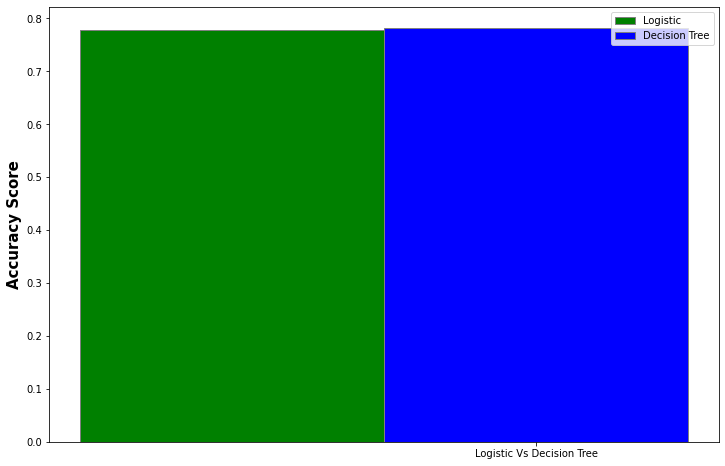

In [271]:
#Comparing the accuracy in a Bar chart
import matplotlib.pyplot as plt
 

barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))
logistic = [lscore]
dt = [score]
 

br1 = np.arange(len(logistic))
br2 = [x + barWidth for x in br1]
 

plt.bar(br1, logistic, color ='g', width = barWidth,
        edgecolor ='grey', label ='Logistic')
plt.bar(br2, dt, color ='b', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')

plt.ylabel('Accuracy Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(logistic))],
        ['Logistic Vs Decision Tree'])
 
plt.legend()
plt.show()

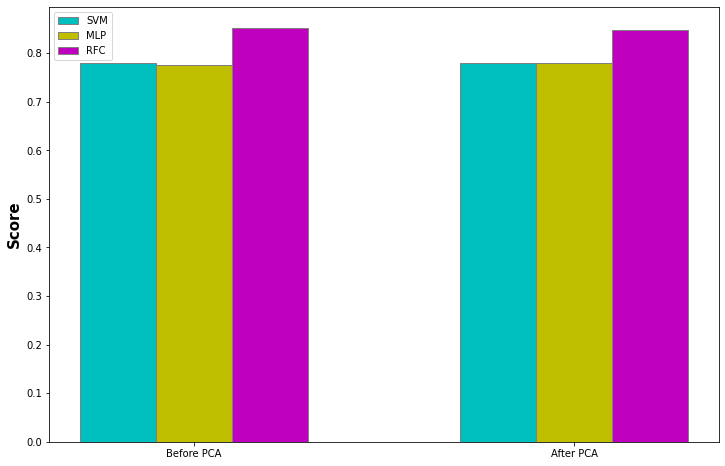

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

v1 = SVC(kernel="linear")

v1.fit(X_train, Y_train)

y_pred1 = v1.predict(X_test)

score_1 = accuracy_score(y_pred1, Y_test)
score_1

from sklearn.neural_network import MLPClassifier

v2 = MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=11000)
v2.fit(X_train, Y_train)

y_pred2 = v2.predict(X_test)

score_2 = accuracy_score(y_pred2, Y_test)
score_2

from sklearn.ensemble import RandomForestClassifier

v3 = RandomForestClassifier(n_estimators=50)
v3.fit(X_train, Y_train)

y_pred3 = v3.predict(X_test)

score_3 = accuracy_score(y_pred3, Y_test)
score_3

div = (wine.columns.shape[0]-1)//2
div

from sklearn.decomposition import PCA 
pca = PCA(n_components=div)

principal_components = pca.fit_transform(x)
principal_components

pca.explained_variance_ratio_

sum(pca.explained_variance_ratio_)

principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1","principle component 2","principle component 3","principle component 4","principle component 5"])

main_df=pd.concat([principal_df,wine[["quality_enc"]]], axis=1)

main_df.head(10)


from sklearn.svm import SVC

v1 = SVC(kernel="linear")

v1.fit(X_train, Y_train)

y_pred1 = v1.predict(X_test)

score_11 = accuracy_score(y_pred1, Y_test)
score_11

from sklearn.neural_network import MLPClassifier

v2 = MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=11000)
v2.fit(X_train, Y_train)

y_pred2 = v2.predict(X_test)

score_22 = accuracy_score(y_pred2, Y_test)
score_22

from sklearn.ensemble import RandomForestClassifier

v3 = RandomForestClassifier(n_estimators=50)
v3.fit(X_train, Y_train)

y_pred3 = v3.predict(X_test)

score_33 = accuracy_score(y_pred3, Y_test)
score_33
 

barWidth = 0.20
fig = plt.subplots(figsize =(12, 8)) 

svm = [score_1, score_11]
mlp = [score_2, score_22]
rfc = [score_3, score_33]

br1 = np.arange(len(svm))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 

plt.bar(br1, svm, color ='c', width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br2, mlp, color ='y', width = barWidth,
        edgecolor ='grey', label ='MLP')
plt.bar(br3, rfc, color ='m', width = barWidth,
        edgecolor ='grey', label ='RFC')
 
#Xticks
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(svm))],
        ['Before PCA', 'After PCA'])
 
plt.legend()
plt.show()